In [3]:
from fsspec.parquet import open_parquet_file
import pyarrow.parquet as pq
from io import BytesIO
from PIL import Image

PARQUET_FILE = 'part_03900' # parquet number
ROW_INDEX = 42 # row number (about 500 per parquet)

url = "https://huggingface.co/datasets/Major-TOM/Core-S2L1C/resolve/main/images/{}.parquet".format(PARQUET_FILE)
with open_parquet_file(url,columns = ["thumbnail"]) as f:
    with pq.ParquetFile(f) as pf:
        first_row_group = pf.read_row_group(ROW_INDEX, columns=['thumbnail'])

stream = BytesIO(first_row_group['thumbnail'][0].as_py())
image = Image.open(stream)

/home/edgelab/.local/lib/python3.10/site-packages/fsspec/parquet.py:223: UserWarning: Not enough data was used to sample the parquet footer. Try setting footer_sample_size >= 1108838.
  warnings.warn(


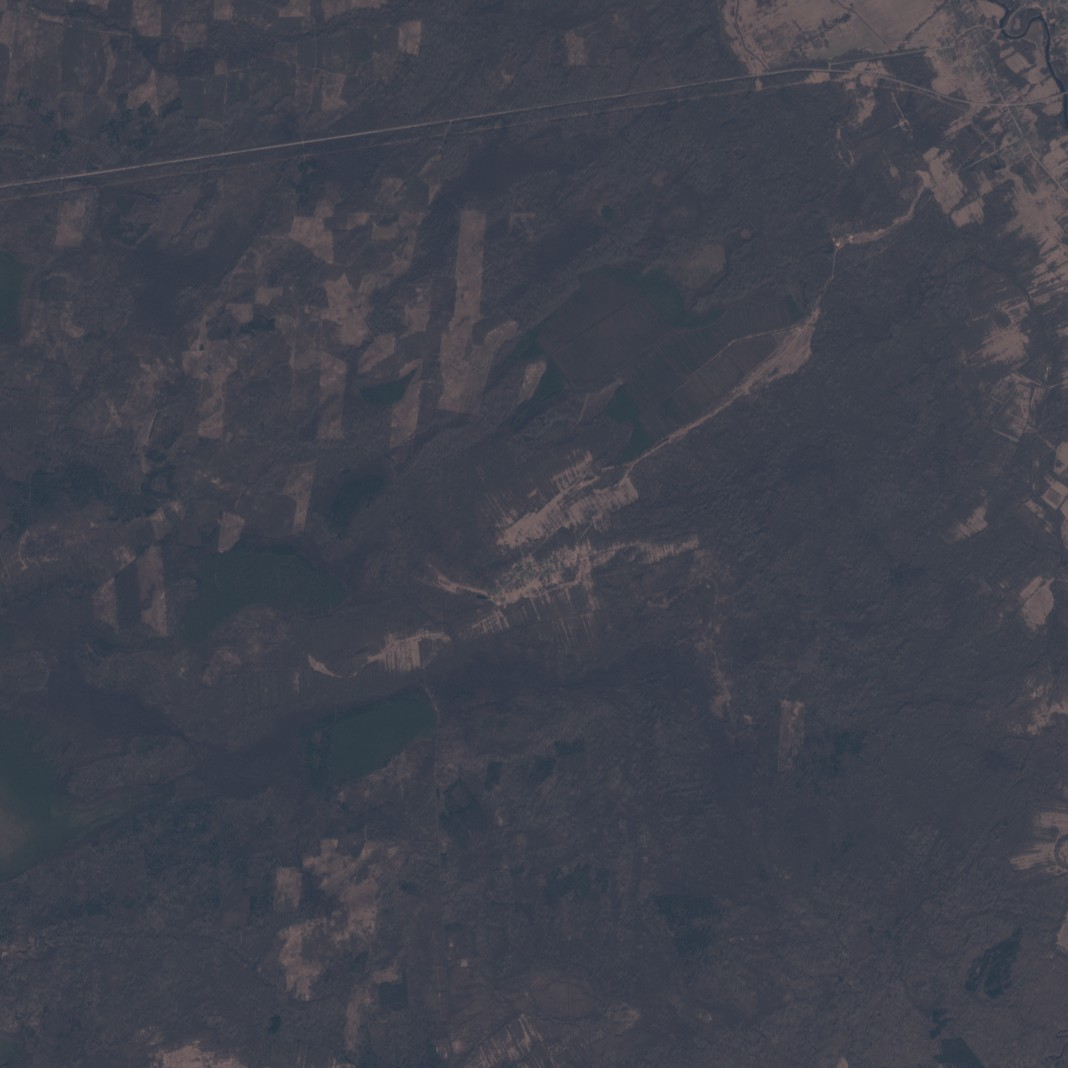

In [5]:
image